<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Transactions-EDA" data-toc-modified-id="Transactions-EDA-1">Transactions EDA</a></span></li><li><span><a href="#EDA-for-transaction_data.csv" data-toc-modified-id="EDA-for-transaction_data.csv-2">EDA for <code>transaction_data.csv</code></a></span></li><li><span><a href="#Business-Summary/tl;dr" data-toc-modified-id="Business-Summary/tl;dr-3">Business Summary/tl;dr</a></span></li><li><span><a href="#EDA-for-transaction_data.csv" data-toc-modified-id="EDA-for-transaction_data.csv-4">EDA for <code>transaction_data.csv</code></a></span><ul class="toc-item"><li><span><a href="#Data-Dictionary-for-transaction_data.csv" data-toc-modified-id="Data-Dictionary-for-transaction_data.csv-4.1">Data Dictionary for <code>transaction_data.csv</code></a></span></li></ul></li><li><span><a href="#General-Sales-Description" data-toc-modified-id="General-Sales-Description-5">General Sales Description</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Disclaimer-on-Sample-Bias" data-toc-modified-id="Disclaimer-on-Sample-Bias-5.0.1">Disclaimer on Sample Bias</a></span></li></ul></li><li><span><a href="#Verifying-and-Understanding-the-Data:-Empty-Sales-Rows" data-toc-modified-id="Verifying-and-Understanding-the-Data:-Empty-Sales-Rows-5.1">Verifying and Understanding the Data: Empty Sales Rows</a></span></li><li><span><a href="#Loyalty-Program" data-toc-modified-id="Loyalty-Program-5.2">Loyalty Program</a></span><ul class="toc-item"><li><span><a href="#Customer-Retention-and-Direct-Marketing" data-toc-modified-id="Customer-Retention-and-Direct-Marketing-5.2.1">Customer Retention and Direct Marketing</a></span></li><li><span><a href="#Subject-Matter-Expertise" data-toc-modified-id="Subject-Matter-Expertise-5.2.2">Subject Matter Expertise</a></span></li></ul></li><li><span><a href="#Finding-Christmas" data-toc-modified-id="Finding-Christmas-5.3">Finding Christmas</a></span><ul class="toc-item"><li><span><a href="#Weekly-Seasonality" data-toc-modified-id="Weekly-Seasonality-5.3.1">Weekly Seasonality</a></span></li></ul></li><li><span><a href="#Adding-Year" data-toc-modified-id="Adding-Year-5.4">Adding Year</a></span><ul class="toc-item"><li><span><a href="#Attaching-Hypothetical-Date-Range" data-toc-modified-id="Attaching-Hypothetical-Date-Range-5.4.1">Attaching Hypothetical Date Range</a></span></li></ul></li><li><span><a href="#Top-15-Sales-Dates" data-toc-modified-id="Top-15-Sales-Dates-5.5">Top 15 Sales Dates</a></span></li><li><span><a href="#Interpretation-and-Final-Datetime-Logic" data-toc-modified-id="Interpretation-and-Final-Datetime-Logic-5.6">Interpretation and Final Datetime Logic</a></span><ul class="toc-item"><li><span><a href="#Adding-Hour-and-Minute" data-toc-modified-id="Adding-Hour-and-Minute-5.6.1">Adding Hour and Minute</a></span></li></ul></li></ul></li><li><span><a href="#add_datetime-function" data-toc-modified-id="add_datetime-function-6"><code>add_datetime</code> function</a></span></li></ul></div>

# Transactions EDA

# EDA for `transaction_data.csv`

Let's take a look at `transaction_data.csv`, where the transactions and sales value is recorded. The business summary is described below; the table description follows, and a general summary of sales data is included. We then were able to add datetime information and a function to do so. 

The final `add_datetime` function is at the end of the notebook.

# Business Summary/tl;dr

- Created an argument which places our data in time and space; its likely from the (north-east) USA from 2004-2006.
- Created add_datetime(df) logic for project package
- Noted inconsistencies (empty sales rows and leading tail) to be truncated for ELT pipeline;
- load_merged() function to be described in the following notebook. Once we have clean transactions with products descriptions, we can perform basic sales analysis.

In [149]:
#import modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 6)
import seaborn as sns
import sqlite3

import datetime
import glob

# database functions
from utilities import read_table,query

# EDA for `transaction_data.csv`

In [60]:
# loading transactions and products; forming `merged` dataframe and dropping 0-'QUANTITY' rows

transactions = read_table('src_transaction_data')#pd.read_csv('data/transaction_data.csv')

In [61]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   basket_id          int64  
 2   day                int64  
 3   product_id         int64  
 4   quantity           int64  
 5   sales_value        float64
 6   store_id           int64  
 7   retail_disc        float64
 8   trans_time         int64  
 9   week_no            int64  
 10  coupon_disc        float64
 11  coupon_match_disc  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


In [62]:
transactions.head()

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [63]:
transactions.columns

Index(['household_key', 'basket_id', 'day', 'product_id', 'quantity',
       'sales_value', 'store_id', 'retail_disc', 'trans_time', 'week_no',
       'coupon_disc', 'coupon_match_disc'],
      dtype='object')

## Data Dictionary for `transaction_data.csv`

`household_key` - identifies the household which made the transaction

`BASKET_ID` - identifies the basket in which the transaction occurred

`DAY` - identifies the day of the transaction

`PRODUCT_ID` - identifies the product purchased

`QUANTITY` - identifies the quantity of item purchased

`SALES_VALUE` - identifies the dollars received by the store for the purchase, including manufacturer redemption/rebates

`STORE_ID` - identifies the store where the transaction occurred

`RETAIL_DISC` - identifies the retail (loyalty) discount

`TRANS_TIME` - identifies the hour and minute of the day when the transaction was recorded

`WEEK_NO` - identifies the week of the transaction
 
`COUPON_DISC` - identifies the amount paid by manufacturer to store; used to calculate 'shelf price' paid by customer

`COUPON_MATCH_DISC` - net losses for the company due to coupon/price-matching (presumably listed by other retailers)

All values are numeric. 

In [64]:
# checking nulls
transactions.isna().sum()

household_key        0
basket_id            0
day                  0
product_id           0
quantity             0
sales_value          0
store_id             0
retail_disc          0
trans_time           0
week_no              0
coupon_disc          0
coupon_match_disc    0
dtype: int64

We have about 2.6 million rows of item-level transactions. The unique identifier for this table is a combination of BASKET_ID and PRODUCT_ID; 

In [65]:
transactions.duplicated().sum()

0

There are no duplicate rows. 

---

# General Sales Description

In [112]:
transactions['sales_value'].sum()

8057463.079999994

Total transactions indicate more than 8 million dollars in sales. We don't have product descriptions in this data yet, so it's difficult to tell much just yet. Let's look at the sales over time, and the histogram of total spend by household.

Text(0.5, 0, 'Day')

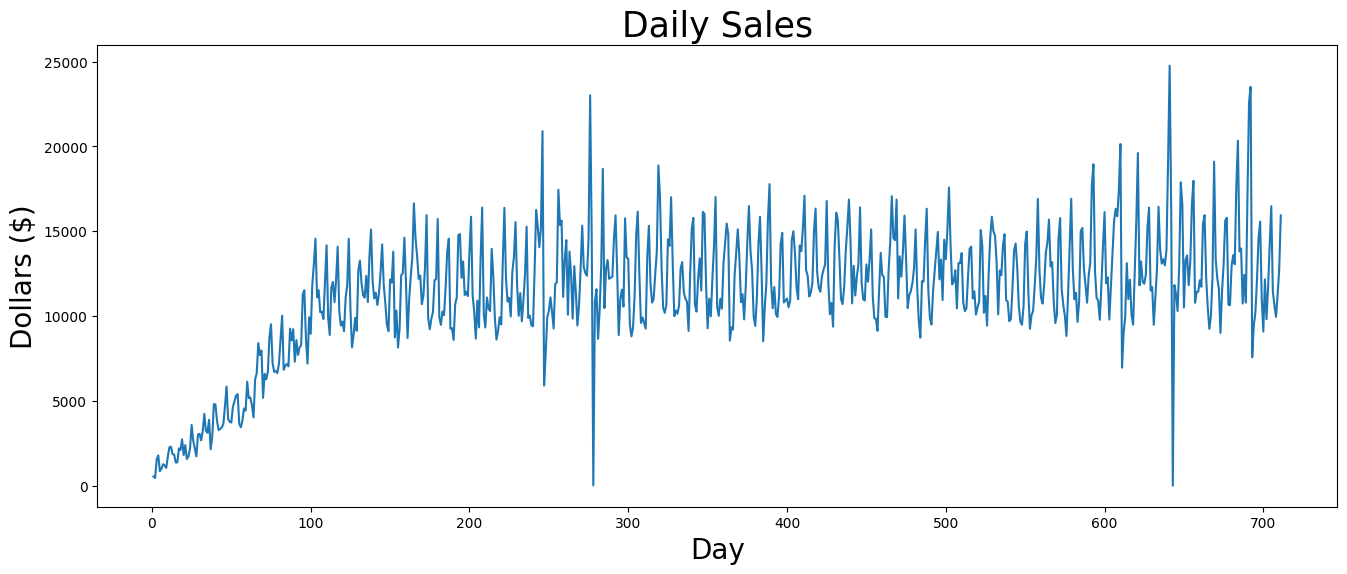

In [68]:
plt.figure(figsize=(16,6))
# plt.subplot(1,2,1)
transactions.groupby('day')['sales_value'].sum().plot()
plt.title('Daily Sales', fontsize=25)
plt.ylabel('Dollars ($)',fontsize=20)
plt.xlabel('Day', fontsize=20)


It's easy to see a data acquisition 'leading tail' -- where we have lower sales up until around day 100, or maybe a little later. The exact date to truncate might require some statistical significance metric.

Additionally, we notice that spend drops to 0 following a huge spike in two places, with a less aggressive uptick/downtick preceding it at about the same time differential each time. quick research suggest this spike might be the result of christmas spending and thanksgiving -- american thanksgiving.

In [70]:
hh_by_sales = transactions.groupby('household_key')['sales_value'].sum()
hh_by_sales.describe()

count     2500.000000
mean      3222.985232
std       3349.026076
min          8.170000
25%        970.740000
50%       2157.750000
75%       4413.320000
max      38319.790000
Name: sales_value, dtype: float64

so, the mean household total spend is within 1 standard deviation of 0.  Clearly we have some outliers on the upper end of our spending "households"! These might be larger organizations. Let's take a look at the top 25% of spenders.

<Axes: ylabel='Frequency'>

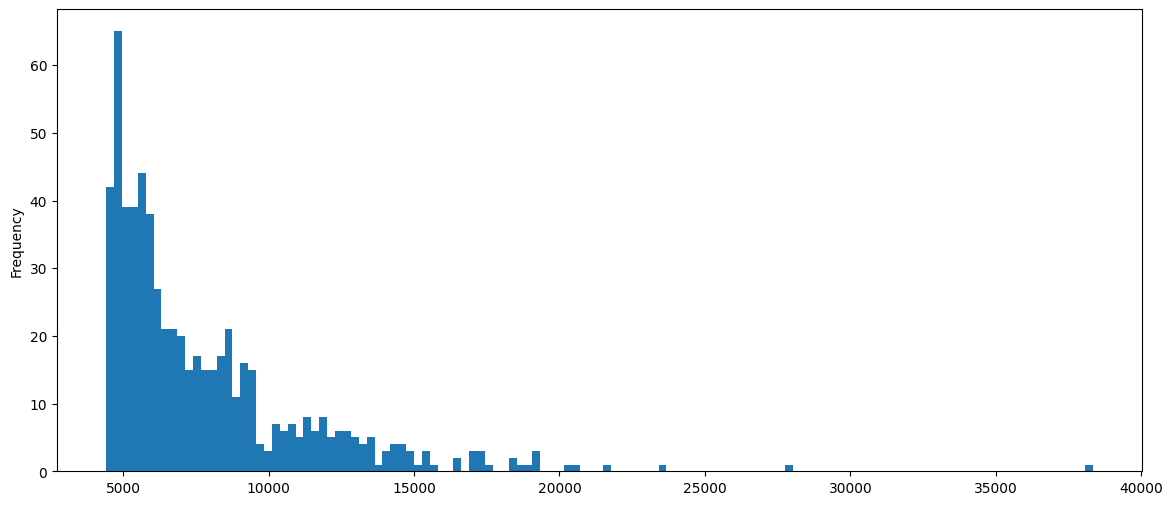

In [71]:
hh_by_sales.sort_values(ascending=False)[:625].plot(kind='hist', bins=125)

Honestly, doesn't look so bad. A couple of outliers.

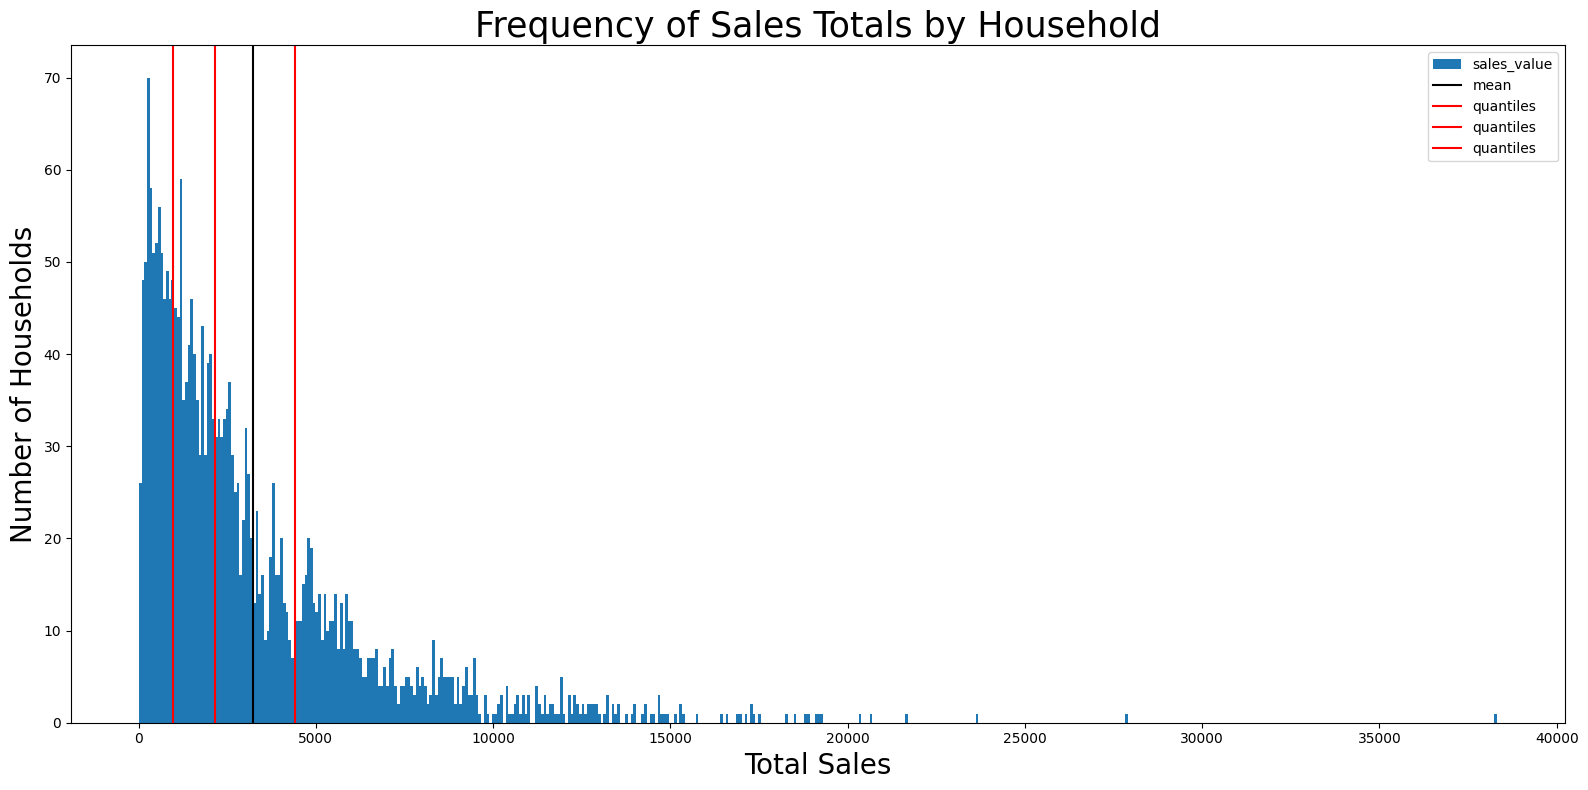

In [72]:
# The chartI'd like to look a little deeper at the histogram of total sales. 

plt.figure(figsize=(16,8))
# hh_by_sales = transactions.groupby('household_key')['SALES_VALUE'].sum()
hh_by_sales.describe()
hh_by_sales.plot(kind='hist', bins=500)
mymean, my25, my50, my75 = hh_by_sales.describe()[['mean', '25%', '50%', '75%']].values
plt.axvline(mymean, c='black', label='mean')
[plt.axvline(x, c='red', label='quantiles') for x in [my25, my50, my75]]
plt.title('Frequency of Sales Totals by Household',fontsize=25)
plt.xlabel('Total Sales',fontsize=20)
plt.ylabel('Number of Households',fontsize=20)
plt.legend()
plt.tight_layout()

We might consider focusing our analysis on the top 25% of households.  

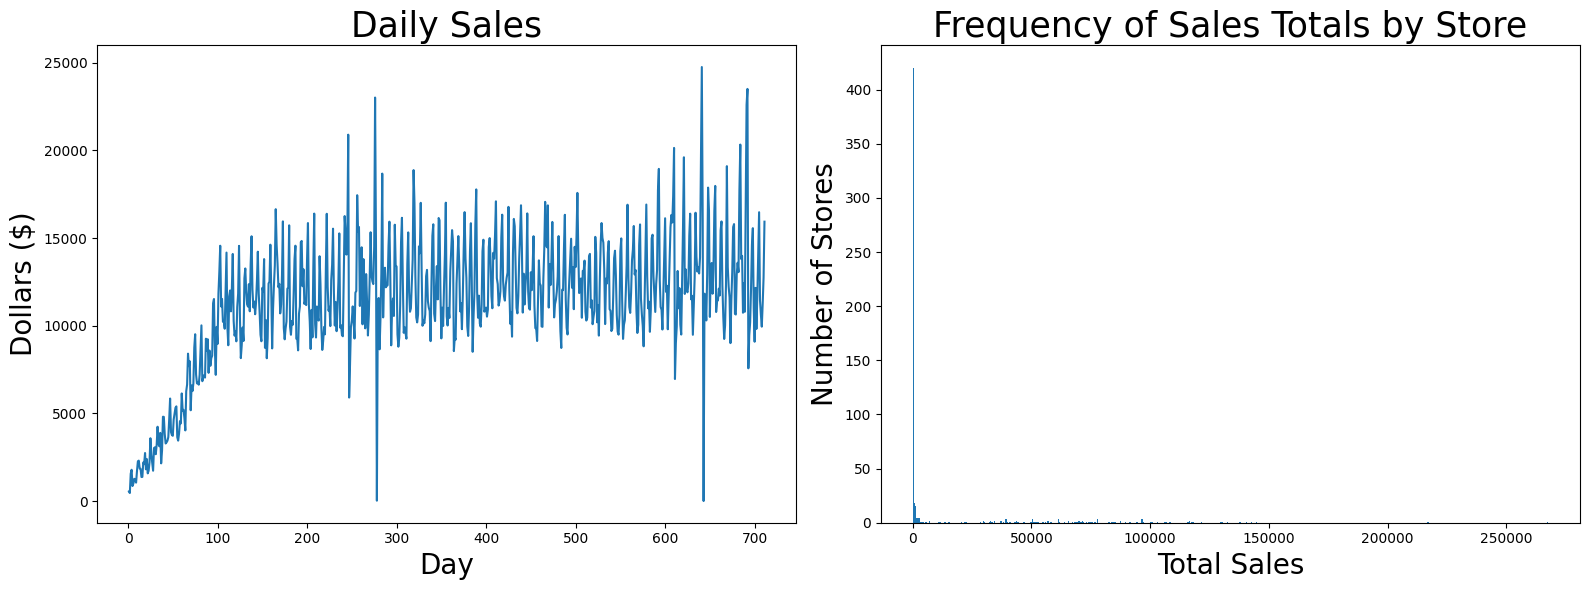

In [73]:
plt.subplots(1,2,figsize=(16,6))
plt.subplot(1,2,1)
transactions.groupby('day')['sales_value'].sum().plot()
plt.title('Daily Sales', fontsize=25)
plt.ylabel('Dollars ($)',fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.subplot(1,2,2)
transactions.groupby('store_id')['sales_value'].sum().plot(kind='hist', bins=500)
plt.title('Frequency of Sales Totals by Store',fontsize=25)
plt.xlabel('Total Sales',fontsize=20)
plt.ylabel('Number of Stores',fontsize=20)
plt.tight_layout()

In [79]:
store_sales = transactions.groupby('store_id')['sales_value'].sum()

store_sales.describe()

count       582.000000
mean      13844.438282
std       32845.126181
min           0.000000
25%          27.972500
50%         100.930000
75%         992.642500
max      267614.340000
Name: sales_value, dtype: float64

Immediately, we can see that our data is likely incomplete -- at least for some of our stores. We are already imagining some downstream tables in order to focus transactions on the top spending households and top selling stores.

We'll take a look at some data modelling in a minute.


### Disclaimer on Sample Bias
We have no idea how large the real underlying market population might be, for a grocery chain of 500+ stores. Affecting the advertising or discount structure

# Coupons Section

#### Verifying and Understanding the Data: Empty Sales Rows

Later in the analysis I ran into trouble when calculating means for certain sales groups. This was because some of the rows in this table have 0 sales value. 

My initial thinking was that these rows could be cancelled transactions, returns, or other human error, and that I should remove them as part of the ETL process. The alternative is that they are somehow involved in coupon redemption; or loyalty rewards. I'll describe the impact of these rows on the discount columns.

In [89]:
no_sales = transactions[(transactions['sales_value'] == 0)]
display(no_sales.head())
print(f"{len(no_sales)} transactions had no recorded sales total")

## sales value == 0
#Around 19000 rows show 0 sales value. 
no_sales[['retail_disc', 'coupon_disc', 'coupon_match_disc']].sum()

## total discounts in the 0-sum transactions

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc
97,744,26985165432,1,5978648,0,0.0,31582,0.0,1119,1,0.0,0.0
128,1287,26985336468,1,5978648,0,0.0,304,0.0,1351,1,0.0,0.0
249,2305,26996870743,2,5978656,0,0.0,414,0.0,1300,1,-1.0,0.0
293,271,26997082949,2,5978656,0,0.0,329,0.0,1719,1,-2.0,0.0
694,315,27008952267,3,957951,0,0.0,327,0.0,1707,1,0.0,0.0


18850 transactions had no recorded sales total


retail_disc         -14724.73
coupon_disc         -10376.71
coupon_match_disc       -5.45
dtype: float64

In [97]:
no_sales[no_sales['quantity']>0]['quantity'].value_counts()
# of 18850 0-sales transactions, 4451 of them had a quantity greater than 0 -- the rest were seemingly empty sales rows, although they had basket ids, product ids, etc. 

quantity
1    4370
2      75
3       5
9       1
Name: count, dtype: int64

#### Coupon Discount and Retail Discount

These rows represent about one quarter of the total `COUPON_DISC` value of transactions in the table:

In [98]:
f"{round(no_sales['coupon_disc'].sum()/transactions['coupon_disc'].sum() * 100,2)}% of all coupon discounts were accounted for in the transactions with no sales totals"

## percentage of coupons used in 0-sales transactions

'24.35% of all coupon discounts were accounted for in the transactions with no sales totals'

In [104]:

print(f"{round(no_sales['retail_disc'].sum()/transactions['retail_disc'].sum() * 100,2)}% of all retail discounts were accounted for in the transactions with no sales totals")
print(f"{transactions['retail_disc'].sum()} was the total retail_disc. {transactions['sales_value'].sum()} was the total sales across all transactions")

## percentage of retail discounts by 0-sales transaction
## total retail discount across all transactions


1.05% of all retail discounts were accounted for in the transactions with no sales totals
-1398334.8400000008 was the total retail_disc. 8057463.079999994 was the total sales across all transactions


17.35

Whoa. The total `retail_disc` is $1.4 million dollars -- but only 1% of that total is included in the 0 sales rows. 

We'll come back to that in a second, but for now; are there any rows which are completely empty of sales value and for which a quantity was not recorded?

We don't know what these rows mean -- it could be an item return or a cancelled scan; we notice there is one row with `QUANTITY` not equal to 0. I've opted to drop these rows and thereby not include them in the association rules algorithm later. They also mess up the calculation of mean sales totals for certain product groups, campaigns, or households.

In [15]:
# empty_rows = transactions[(transactions['SALES_VALUE'] == 0) & 
#                           (transactions['RETAIL_DISC']==0) &
#                           (transactions['COUPON_DISC']==0) &
#                           (transactions['COUPON_MATCH_DISC']==0)
#                          ]


## Loyalty Program


In [105]:

abs(round(transactions['retail_disc'].sum()/transactions['sales_value'].sum() * 100,2))

# we need to find out if the retail disc is included in the sales value, or not -- it represents 20% of our total sales

17.35

Loyalty discounts accounted for $1.4M, equivalent to **~17.4\% of our total revenue.** 

### Customer Retention and Direct Marketing

The strong engagement with `RETAIL_DISC` column immediately offers a point of engagement with our customers.

The loyalty program is a forum where the grocer could advertise; for example through a phone app where they could choose what types of products they'd like to receive notifications or promotions for. Not only would an app offer personalization,  it could also drive brand identity, should customers be able to select specific products or types of products that they want to engage with. 

If we're offering direct marketing campaigns as a means of bringing people into the store, then why not use the loyalty program instead? It seems to be doing well with our repeat customers. Strong engagement with a loyalty program will keep shoppers coming back again and again; offering consistent mutual value. It can cost 5-25 times more in terms of advertising to acquire a new customer than to keep an existing one. 


### Subject Matter Expertise
The task of creating a new loyalty program is a complicated one, and you probably risk offending your customers by replacing or reducing an existing loyalty program, so any changes to it should be carefully thought out. Customer attraction/retention on a store level can't be easily examined without more context -- there are a ton of factors at play. I'm not a subject matter expert by any means. 

The scope of this data is insufficient to examine for example the local competitors for each store or the implications of restructuring the Loyalty Program on the entire market population. However, it is worth noting that this loyalty program represents many of the dynamics at play, from a statistical and data perspective.



# Part 2: Placing the data in space and time 

## Finding Christmas

I decided to try to place the data in time and space. At the very least I'd like to have 'day of the week' in order to examine seasonality. From there it should simply be a matter of looking up the years where Christmas fell on those days of the week. 

Let's look at the lowest `SALES_VALUE` per `DAY` on the chart, disregarding the first 120 days (we'll assume there is an issue with data acquisition there).

In [110]:
#print lowest sales days:
print(f"Lowest Sum of SALES_VALUE by Day: \n{transactions[transactions['day'] > 120].groupby('day')['sales_value'].sum().nsmallest(20).head(8)}") # find Christmas Day, when stores are closed
print()
print(f"The lowest Sales totals were on days 643 and 278. They were {643-278} days apart.\nThe third and fourth lowest were on days 611 and 247. They were {611-247} days apart.")

print(f'as pairs, they were respectively {643-611} and {278-247} days apart')

Lowest Sum of SALES_VALUE by Day: 
day
643       2.99
278      22.49
247    5905.22
611    6962.69
693    7573.73
248    7785.53
155    8147.01
126    8154.52
Name: sales_value, dtype: float64

The lowest Sales totals were on days 643 and 278. They were 365 days apart.
The third and fourth lowest were on days 611 and 247. They were 364 days apart.
as pairs, they were respectively 32 and 31 days apart


If we work under the assumption that these two lowest points are Christmas Day, despite not having precisely $0 in sales, it gives us a solid chance of identifying the real dates from which this data originates, because Christmas falls on a different day of the week each year. We can examine our weekly seasonality of spend in order to place. Let's try to find the day of the week of those two Christmases.

### Weekly Seasonality

By looking more closely at the data and leveraging some domain knowledge, we can identify days of the week of our sales data by finding a weekly seasonal pattern.

These highest-grossing days are **Saturdays, the busiest day for grocery shopping**. Using this information, we can extrapolate the days of the week for our two Christmases, and then check which years had that sequence of Christmas weekdates.

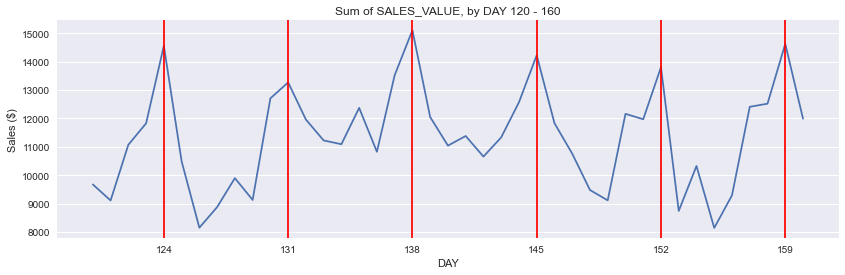

In [24]:
### Using a closer view, we can see the weekly seasonality.
start=120
stop=160

myslice = transactions[transactions['DAY'].between(start, stop)]
plt.figure(figsize=(14,4))
plt.title(f'Sum of SALES_VALUE, by DAY {start} - {stop}')

plt.plot(myslice.groupby('DAY')['SALES_VALUE'].sum())

sats = [124, 131, 138, 145]

for sat in range(sats[0], stop, 7):
    plt.axvline(sat, color='red')

plt.ylabel('Sales ($)')
plt.xlabel('DAY')
plt.xticks(range(sats[0], stop, 7))
plt.show()

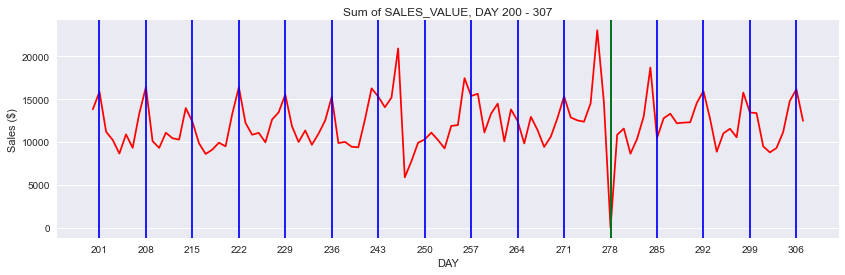

In [25]:
# (CHRISTMAS 1) and extrapolated to find that DAY 278 actually is a Saturday:

plt.figure(figsize=(14,4))
start = 200
stop = 307
myslice = transactions[transactions['DAY'].between(start, stop)]
plt.title(f'Sum of SALES_VALUE, DAY {start} - {stop}')

plt.plot(myslice.groupby('DAY')['SALES_VALUE'].sum(), color='red')

sats = [201]
for sat in range(sats[0], stop, 7):
    plt.axvline(sat, color='blue')
plt.xticks(range(sats[0], stop, 7))

plt.ylabel('Sales ($)')
plt.xlabel('DAY')
plt.axvline(278, color='green')
plt.show();


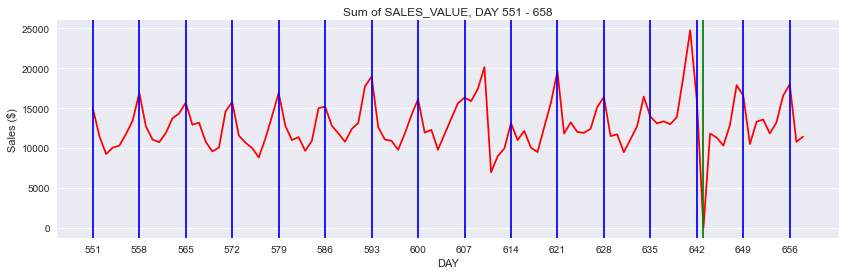

In [26]:
# (CHRISTMAS 2) DAY 643 is a Sunday.  

plt.figure(figsize=(14,4))
start = 551
stop = 658
myslice = transactions[transactions['DAY'].between(start, stop)]
plt.title(f'Sum of SALES_VALUE, DAY {start} - {stop}')

plt.plot(myslice.groupby('DAY')['SALES_VALUE'].sum(), color='red')

sats = [551]
for sat in range(sats[0], stop, 7):
    plt.axvline(sat, color='blue')
plt.xticks(range(sats[0], stop, 7))

plt.ylabel('Sales ($)')
plt.xlabel('DAY')
plt.axvline(643, color='green')
plt.show();

# 643 is a Sunday

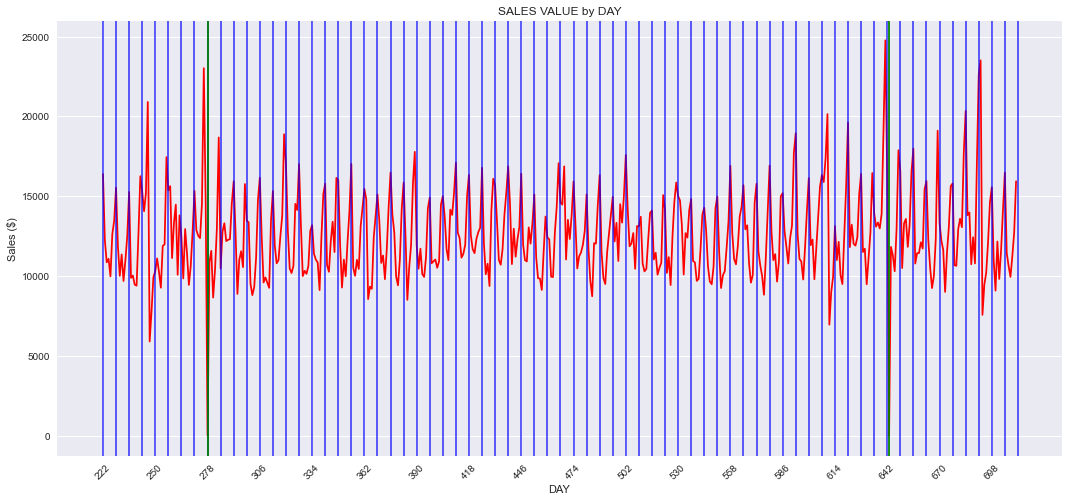

In [27]:
# plot sum of sales by day, identifying christmas and weekly seasonality

start = 222
stop = 713

myslice = transactions[transactions['DAY'].between(start, stop)]

plt.figure(figsize=(18, 8))
plt.title('SALES VALUE by DAY')
plt.ylabel('Sales ($)')
plt.xlabel('DAY')
plt.plot(myslice.groupby('DAY')['SALES_VALUE'].sum(), c='red')
plt.xticks(rotation=45)


for i in range(start, stop, 7):
    plt.axvline(i, c='blue', alpha=0.7)
    
sats=[222]
plt.axvline(278, c='g')
plt.axvline(643, c='g')
plt.xticks(range(sats[0], stop, 28))
plt.show();


## Adding Year

Day 278 is itself a Saturday, and 643 is a Sunday. Let's look up when that combination occured in recent history:

[https://www.timeanddate.com/holidays/us/christmas-day#tb-hol_obs](https://www.timeanddate.com/holidays/us/christmas-day#tb-hol_obs)

Christmas fell on a Saturday and then a Sunday twice in the past 20 years; in 2004/2005, and in 2010/2011. Unfortunately (and predictably), American Thanksgiving also lined up exactly.We'll have to look for more information in the data.

Despite being unsure of the specific year, we can now assign a date(time) range to our data -- at the very least, we know the weekdays will match up. We're down to two potential timeframes; that's closer than we were. In classic statistics fashion, I flipped a coin. Let's make a start. 

### Attaching Hypothetical Date Range
I'm going to create a datetime range which corresponds to the number of days in our data, and put it up alongside the information we do have; first using the year 2004, and then the year 2010.

In [28]:
# extrapolating datetime range from first christmas as DAY 278, year=2004
import datetime

# set year, and first christmas a date
year=2004
christmas1 = datetime.date(year, 12, 25)
# timedelta to day 1
delta = datetime.timedelta(days=277) #278-1

# DAY 1 is christmas minus the delta (1 + 277 = 278)
first = christmas1 - delta
# DAY 711 is (1 + 710)
last = first + datetime.timedelta(710) 
print(f'first: {first}, last: {last}')

# creating range and constructing a map of values for 'DAY' column;
# create a range of datetime objects
myrange = pd.date_range(first, last)
#len(myrange) # 711

# map datetime index to DAY; enumerate() indexes from 0, so we add 1
mymap = {i+1:x for i, x in enumerate(myrange)}

# check the column to add
# transactions['DAY'].map(lambda x: mymap[x])


# check index(day) 278 is still christmas
print(f'Confirming christmas 1 is at DAY 278: {mymap[278]}')
#mymap


# mapping and applying to transactions df...

transactions['datetime'] = transactions['DAY'].map(lambda x: mymap[x])

transactions['datetime']

first: 2004-03-23, last: 2006-03-03
Confirming christmas 1 is at DAY 278: 2004-12-25 00:00:00


0         2004-03-23
1         2004-03-23
2         2004-03-23
3         2004-03-23
4         2004-03-23
             ...    
2595727   2006-03-03
2595728   2006-03-03
2595729   2006-03-03
2595730   2006-03-03
2595731   2006-03-03
Name: datetime, Length: 2595732, dtype: datetime64[ns]

So we have a datetime range spanning from March 23, 2004 to March 3, 2006. 

We can easily go back and check the year to the equivalent dates beginning in 2010, should that be necessary -- the code will require just one change. 

Let's dive a little bit deeper to identify other outlying sales points, and perhaps associate them with world events unique to either 2004-2006, or 2010-2012... I'm thinking Superbowls, Black Friday, etc. -- or maybe we get lucky.

## Top 15 Sales Dates

Let's look at the outlying sales dates.

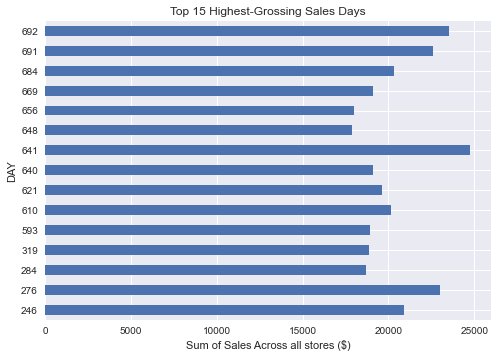

In [29]:
# TOP 15 sales dates in the data, sorted by DAY 
transactions[transactions['DAY'] > 120].groupby('DAY')['SALES_VALUE'].sum().nlargest(15).reset_index().sort_values('DAY').set_index('DAY').plot(kind='barh')
plt.title('Top 15 Highest-Grossing Sales Days')
plt.legend([])
plt.xlabel('Sum of Sales Across all stores ($)')
plt.show()

The top 15 sales dates are listed above, by descending order of DAY.

There were back-to-back high-ranking sales numbers on DAY 691 and 692 -- an anomaly. 

DAY 692 actually had higher sales than the friday before the first 'Christmas'.

What could possibly drive sales up so high as to compete with Christmas?


## Interpretation and Final Datetime Logic

So what happened on DAY 691 and 692?

In [30]:
mymap[691] # Second-Highest sales date, even above First Christmas -- 

Timestamp('2006-02-11 00:00:00', freq='D')

February 11, 2006 is the date, if we are correct about the year.

I searched back through Google.

It turns out **there was a huge storm in the Northeastern US on February 11/12 of 2006** --  As per [https://www.thepeoplehistory.com/february11th.html](https://www.thepeoplehistory.com/february11th.html);

`What has become known as the Blizzard of 2006 started on the evening of the 11th. Heavy snow fell across the northeastern United States from Virginia to Maine through to the evening of the 12th.`

There is no equivalent for those days in 2012, as far as I can tell. 

2006 is a likely bet for the correct year, and moreover gives us an idea of the location of at least some of these stores -- the Northeastern United States. 

Jackpot.

### Adding Hour and Minute

There's one more thing we need to do to complete the datetime column: add in the transaction time, stored in `TRANS_TIME`.

In [23]:
# converting TRANS_TIME to str to find LENGTH of entry; vectorizing the string lengths and counting values:
vec = transactions['TRANS_TIME'].astype('str')
vec2 = pd.Series([len(x) for x in vec]) 
transactions['vec2'] = vec2
vec2.value_counts()

4    2430677
3     147637
2      14038
1       3380
dtype: int64

So, there are `TRANS_TIME` values with up to 4 digits, and much fewer as we approach 0 digits. Seems promising.

Let's look at the length of each entry:

In [24]:
# 00:0X -- 1 digit entries -- unique values
transactions[transactions['vec2']==1]['TRANS_TIME'].unique()
# 0-9 values... one digit of minutes

array([0, 5, 6, 9, 7, 8, 2, 4, 3, 1], dtype=int64)

In [30]:
# 00:XX -- 2 digit entries
# nothing over 59... two digits of minutes
transactions[transactions['vec2']==2]['TRANS_TIME'].min(), transactions[transactions['vec2']==2]['TRANS_TIME'].max()

(10, 59)

In [32]:
# 0X:XX -- 3 digit entries -- number of unique values [1,2,...9 * 60]
# we would expect to see single digit hours with 60 minutes each:
transactions[transactions['vec2']==3]['TRANS_TIME'].min(), transactions[transactions['vec2']==3]['TRANS_TIME'].max()

(100, 959)

3-digit TRANS_TIME had 540 unique values -- exactly 9 hours worth of 3-digit timestamps. This corresponds to 01:00 through 9:59.

00:01 through 00:59

In order to map the `TRANS_TIME` to datetime effectively, let's fill the empty spaces in the column with 0's, such that we can apply timedelta.

In [37]:
# define a function to split TRANS_TIME into hour and minute values:
def split_column(row):
    if len(str(row)) ==1:
        hour = "00"
        minute = "0"+str(row)[1:]
    elif len(str(row)) == 2:
        hour = "00"
        minute = str(row)
    elif len(str(row)) ==3:
        hour = "0" + str(row)[0]
        minute = str(row)[-2:]
    elif len(str(row)) ==4:
        hour = str(row)[:2]
        minute = str(row)[2:]
        
    return hour, minute

# split TRANS_TIME and create HOUR and MINUTE vectors; convert to timedelta format;
a = transactions['TRANS_TIME'].apply(split_column)

transactions['HOUR'] = [element[0] for element in a]
transactions['MINUTE'] = [element[1] for element in a]

transactions['HOUR'] = pd.to_timedelta(transactions['HOUR'].astype('int'), unit='hour')
transactions['MINUTE'] = pd.to_timedelta(transactions['MINUTE'].astype('int'), unit='minute')

# broadcast timedelta to the datetime column and drop 'vec2', 'HOUR', 'MINUTE' columns
transactions['datetime'] = transactions['datetime'] + transactions['HOUR'] + transactions['MINUTE']

# dropping the columns we used
transactions.drop(['vec2', 'HOUR', 'MINUTE'], axis=1, inplace=True)

transactions['datetime']

0         2004-03-23 16:31:00
1         2004-03-23 16:31:00
2         2004-03-23 16:31:00
3         2004-03-23 16:31:00
4         2004-03-23 16:31:00
                  ...        
2595727   2006-03-03 15:20:00
2595728   2006-03-03 15:20:00
2595729   2006-03-03 15:20:00
2595730   2006-03-03 15:20:00
2595731   2006-03-03 15:20:00
Name: datetime, Length: 2595732, dtype: datetime64[ns]

In [39]:
# transactions['datetime'].to_csv('data/outputs/transactions_datetime.csv')

# `add_datetime` function

below is the `add_datetime` function for the project package.

In [117]:
def add_datetime(df):

    def make_date_map(df, dates='day'):
        # 'DAY' 1 == 2004-03-23
        day1 = datetime.datetime(2004, 3, 23) # as derived in transactions notebook; datetime for 'DAY' == 1
        ineedthismany = df[dates].max()
        last = day1 + datetime.timedelta(days=int(ineedthismany))
        date_range = pd.date_range(day1, last) # date range for our data
        # map datetime index to DAY; enumerate() indexes from 0, so we add 1
        date_map = {i+1:x for i, x in enumerate(date_range)}

        output = df[dates].map(date_map)
        output = pd.to_datetime(output)
        return output

    def make_time_map(df, times='trans_time'):
        ''''''
        # pad zeros
        output = df[times].astype(str).str.zfill(4)

        # split to hours and minutes
        hours = output.str[:2]
        minutes = output.str[2:]

        # convert to timedelta
        hours = pd.to_timedelta(hours.astype('int'), unit='hour')
        minutes = pd.to_timedelta(minutes.astype('int'), unit='minute')
        output = hours + minutes
        return output
    
    return make_date_map(df) + make_time_map(df)


In [118]:

# could this be a custom sql function? we're using sqlite so maybe not

0         2004-03-23 16:31:00
1         2004-03-23 16:31:00
2         2004-03-23 16:31:00
3         2004-03-23 16:31:00
4         2004-03-23 16:31:00
                  ...        
2595727   2006-03-03 15:20:00
2595728   2006-03-03 15:20:00
2595729   2006-03-03 15:20:00
2595730   2006-03-03 15:20:00
2595731   2006-03-03 15:20:00
Length: 2595732, dtype: datetime64[ns]

Notes February 2024:

It's debatable whether to include the datetime mapping in our initial ingestion function -- since we're working with CSV files, we might as well include this vital information instead of duplicating it. There are some other staging or cleaning steps to consider, such as truncating the leading tail.  It's arguable that some manner of statistical significance should be involved to perform the truncation -- to prevent skewing later results regarding trends in the timeseries. 

 

I'm going to opt for the dbt-style staging table transform here, and double up on the data. We can also drop the DAY and TRANS TIME columns. This staged table will be upstream from at least two downstream transactions tables -- for top spenders, and for top selling stores. Moreover, we will use it to combine with product data, drop coupon discount data, 

In [135]:

#",".join(" ".join(zip(dct.keys(), dct.values())))

col_type_mapping = {"household_key": "INTEGER", 
                    "basket_id" :"INTEGER", 
                    "day" :"INTEGER", "product_id": 
                    "INTEGER", "quantity": "INTEGER", 
                    "sales_value": "REAL", "store_id": 
                    "INTEGER", "retail_disc": "REAL", 
                    "trans_time": "INTEGER", "week_no": 
                    "INTEGER", "coupon_disc": "REAL", 
                    "coupon_match_disc": "REAL"}

columns_string = ",".join(list(map(lambda x: f'"{x[0]}" {x[1]}', col_type_mapping.items())))

'"household_key" INTEGER,"basket_id" INTEGER,"day" INTEGER,"product_id" INTEGER,"quantity" INTEGER,"sales_value" REAL,"store_id" INTEGER,"retail_disc" REAL,"trans_time" INTEGER,"week_no" INTEGER,"coupon_disc" REAL,"coupon_match_disc" REAL'

In [137]:
from utilities import dunnhumby_datetime_column


def transform_transactions_source_to_stage1():

    transactions = read_table('src_transaction_data')
    transactions['datetime'] = dunnhumby_datetime_column(df)
    transactions = transactions[(transactions['datetime'] >= "2004-7-1") & (transactions['datetime'] < "2006-3-1")]
    transactions.drop(['day', 'trans_time', 'week_no'], axis=1, inplace=True)
    transactions = transactions.reindex(['datetime','basket_id','product_id','quantity', 'sales_value', 'retail_disc', 'coupon_disc', 'coupon_match_disc', 'store_id','household_key'],axis=1)
    return transactions

In [139]:
transactions.drop(['day', 'trans_time', 'week_no'], axis=1, inplace=True)

C:\Users\polan\AppData\Local\Temp\ipykernel_22256\114698957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions.drop(['day', 'trans_time', 'week_no'], axis=1, inplace=True)


In [144]:
transactions = transactions.reindex(['datetime','basket_id','product_id','quantity', 'sales_value', 'retail_disc', 'coupon_disc', 'coupon_match_disc', 'store_id','household_key'],axis=1)

In [148]:


columns_string

'"datetime" DATE,"basket_id" INTEGER,"product_id" INTEGER,"quantity" INTEGER,"sales_value" REAL,"retail_disc" REAL,"coupon_disc" REAL,"coupon_match_disc" REAL,"store_id" INTEGER,"household_key" INTEGER'

In [150]:

def create_transaction_data_stage1(df):
    ''' no primary key defined here... should be compound betweeen basket_id and product_id if im not mistaken.. '''
    table_name = 'stg_transaction_data'

    col_type_mapping = {"datetime": "DATE",
                    "basket_id" :"INTEGER", 
                    "product_id": "INTEGER", 
                    "quantity": "INTEGER", 
                    "sales_value": "REAL",
                    "retail_disc": "REAL", 
                    "coupon_disc": "REAL", 
                    "coupon_match_disc": "REAL",
                    "store_id": "INTEGER",
                    "household_key": "INTEGER", 
                    # "day" :"INTEGER",
                    # "trans_time": "INTEGER", 
                    # "week_no": "INTEGER",
                    }

    columns_string = ",".join(list(map(lambda x: f'"{x[0]}" {x[1]}', col_type_mapping.items())))

    con = sqlite3.connect('dunnhumby.db')
    con.execute(f'CREATE TABLE "{table_name}" ({columns_string})')
    with con:
        try:
            columns = ",".join([f"'{x}'" for x in df.columns])
            for row in df.iterrows():
                values = ",".join([f"'{x}'" for x in row[1].values])
                #print(f'INSERT INTO {table_name} ({columns}) VALUES ({values})')
                con.execute(f'INSERT INTO {table_name} ({columns}) VALUES ({values})')
        except BaseException as e:
            print(e)
            con.rollback()
    # TEST    
    # could test column names too
    assert df.shape == (query(f'select count(*) from {table_name}').values[0][0], len(query(f'select * from {table_name} LIMIT 1').values[0]))
    print(f'{table_name} successfully created')

In [152]:
create_transaction_data_stage1(transactions)

stg_transaction_data successfully created


---